In [53]:
'''
University of Toronto, Faculty of Information, Master of Information Program
Course: INF2178H S LEC0101 20241:Experimental Design for Data Science
Assignment 1
Date: Feb.4, 2024
Student name and number:Jiajun Yang 1010128862
'''

'\nUniversity of Toronto, Faculty of Information, Master of Information Program\nCourse: INF2178H S LEC0101 20241:Experimental Design for Data Science\nAssignment 1\nDate: Feb.4, 2024\nStudent name and number:Jiajun Yang 1010128862\n'

In [54]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Data Loading and Processing

In [55]:
# load dataset and display
data = pd.read_excel("/content/INF2178_A1_data.xlsx")
data.head(10)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN
6,2021-01-01,COSTI Immigrant Services,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,120,Room Based Capacity,NaN,NaN,46.0,44.0
7,2021-01-01,COSTI Immigrant Services,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,130,Room Based Capacity,NaN,NaN,46.0,44.0
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,NaN,NaN,145.0,145.0
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0


In [56]:
# Select columns to be analyzed
columns_of_interest = [
    'CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT',
    'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS',
    'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'
]

# Creating a new DataFrame with only the columns of interest
data = data[columns_of_interest]
data

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...
50939,Bed Based Capacity,Emergency,6,20.0,6.0,NaN,NaN
50940,Bed Based Capacity,Emergency,23,23.0,23.0,NaN,NaN
50941,Bed Based Capacity,Transitional,13,14.0,13.0,NaN,NaN
50942,Bed Based Capacity,Emergency,10,10.0,10.0,NaN,NaN


In [57]:
# Displaying basic descriptive statistics for numerical columns
descriptive_stats = data.describe()
descriptive_stats

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598
std,53.326049,27.127682,26.379416,59.448805,58.792954
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,15.000000,14.000000,19.000000,16.000000
50%,28.000000,25.000000,23.000000,35.000000,34.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000


# Exploratory data analysis(EDA)

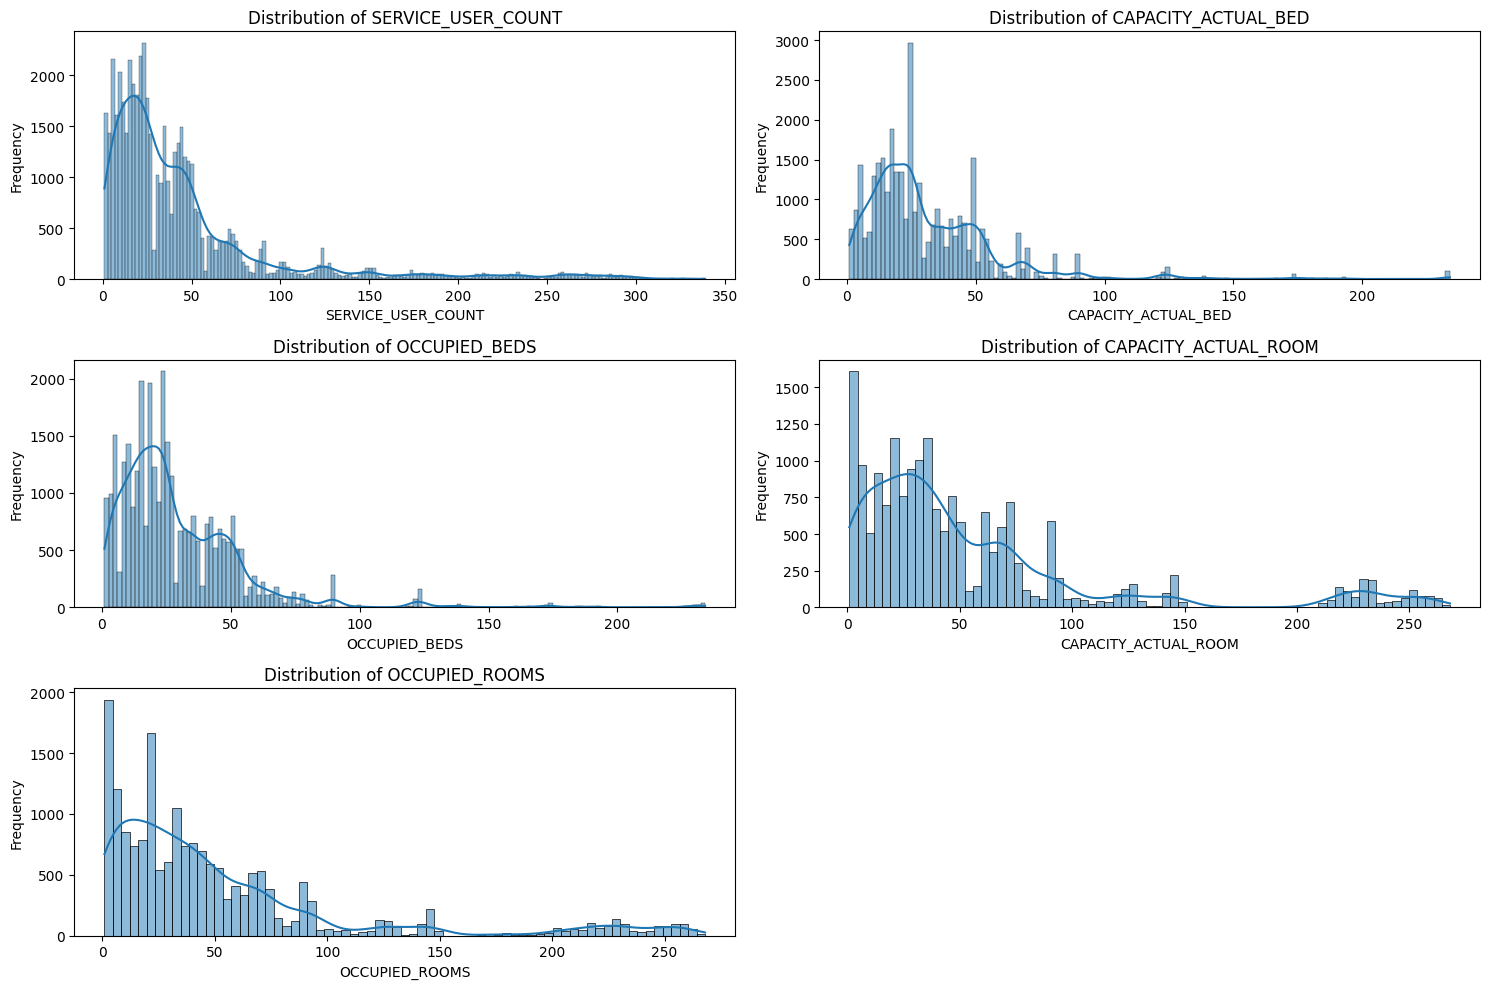

In [58]:
# EDA: Data Distribution with Histograms
numerical_columns = ['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']

# Plotting histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[data[col].notnull()][col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

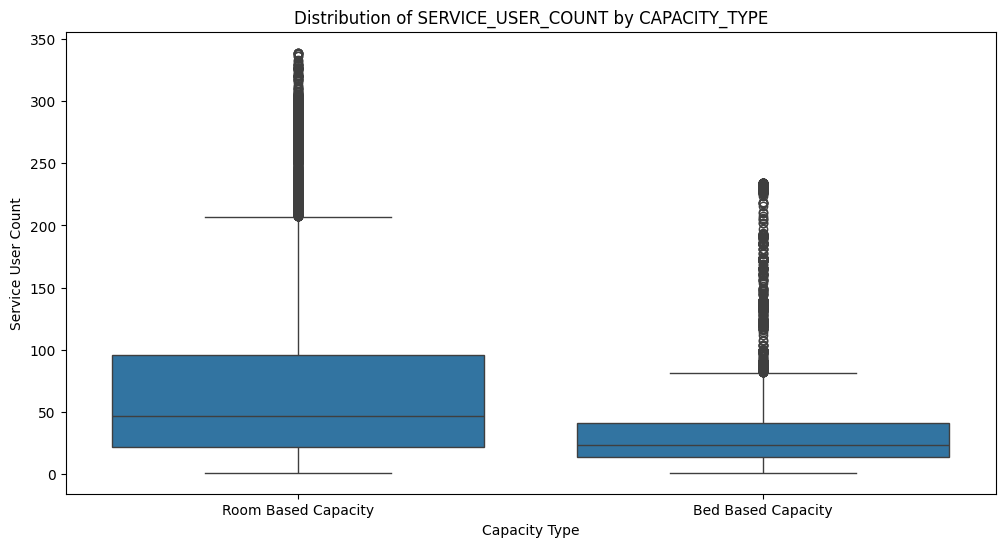

In [59]:
# Plotting the distribution of SERVICE_USER_COUNT for each category in CAPACITY_TYPE
plt.figure(figsize=(12, 6))
# Using seaborn's boxplot for a detailed distribution comparison
sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', data=data)
plt.title('Distribution of SERVICE_USER_COUNT by CAPACITY_TYPE')
plt.xlabel('Capacity Type')
plt.ylabel('Service User Count')
plt.show()

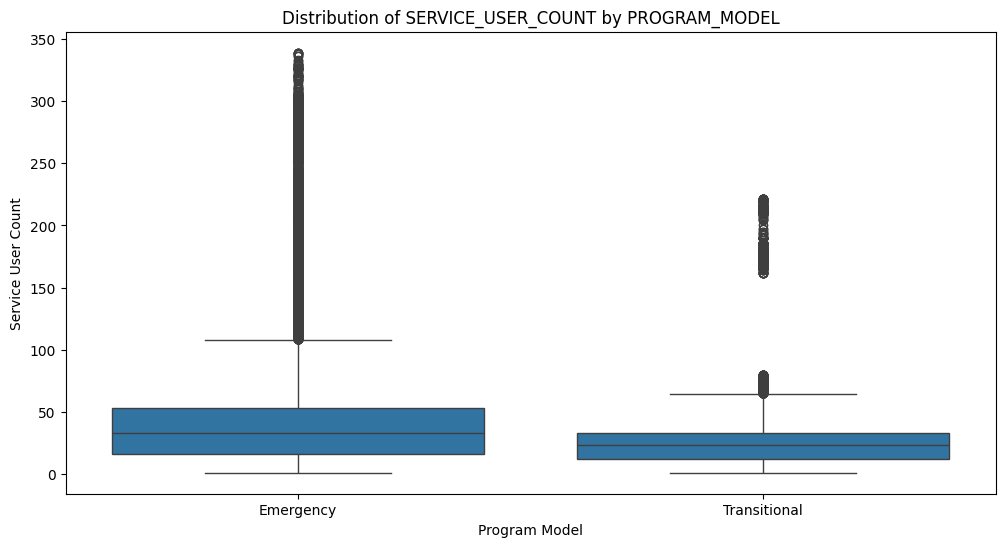

In [60]:
# Plotting the distribution of SERVICE_USER_COUNT for each category in PROGRAM_MODEL
plt.figure(figsize=(12, 6))
# Using seaborn's boxplot for a detailed distribution comparison
sns.boxplot(x='PROGRAM_MODEL', y='SERVICE_USER_COUNT', data=data)
plt.title('Distribution of SERVICE_USER_COUNT by PROGRAM_MODEL')
plt.xlabel('Program Model')
plt.ylabel('Service User Count')
plt.show()

# T-test Cleanning Data

In [61]:
# Create a function to calculate the occapied rate based on the capicity type
def calculate_occupied_rate(row):
    if row['CAPACITY_TYPE'] == 'Bed Based Capacity':
        return row['OCCUPIED_BEDS'] / row['CAPACITY_ACTUAL_BED']
    elif row['CAPACITY_TYPE'] == 'Room Based Capacity':
        return row['OCCUPIED_ROOMS'] / row['CAPACITY_ACTUAL_ROOM']
    else:
        return None

In [62]:
# Implement the function to the dataset and creat a new column to store occapied rate
data['OCCUPIED_RATE'] = data.apply(calculate_occupied_rate, axis=1).dropna()
data

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPIED_RATE
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0,0.896552
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0,1.000000
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0,0.821429
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0,1.000000
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0,0.928571
...,...,...,...,...,...,...,...,...
50939,Bed Based Capacity,Emergency,6,20.0,6.0,NaN,NaN,0.300000
50940,Bed Based Capacity,Emergency,23,23.0,23.0,NaN,NaN,1.000000
50941,Bed Based Capacity,Transitional,13,14.0,13.0,NaN,NaN,0.928571
50942,Bed Based Capacity,Emergency,10,10.0,10.0,NaN,NaN,1.000000


# T-test Analysis of Occupancy Rates by Capacity type


In [63]:
# Separating data based on Capacity Type: 'Bed Based Capacity' and 'Room Based Capacity'
bed_based_data = data[data['CAPACITY_TYPE'] == 'Bed Based Capacity'].drop(
    ['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'], axis=1)

room_based_data = data[data['CAPACITY_TYPE'] == 'Room Based Capacity'].drop(
    ['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS'], axis=1)

In [64]:
# Display the bed_based_data dataset
bed_based_data

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,OCCUPIED_RATE
5,Bed Based Capacity,Emergency,6,8.0,6.0,0.750000
10,Bed Based Capacity,Emergency,22,24.0,22.0,0.916667
11,Bed Based Capacity,Emergency,8,12.0,8.0,0.666667
21,Bed Based Capacity,Transitional,10,12.0,10.0,0.833333
25,Bed Based Capacity,Emergency,11,12.0,11.0,0.916667
...,...,...,...,...,...,...
50939,Bed Based Capacity,Emergency,6,20.0,6.0,0.300000
50940,Bed Based Capacity,Emergency,23,23.0,23.0,1.000000
50941,Bed Based Capacity,Transitional,13,14.0,13.0,0.928571
50942,Bed Based Capacity,Emergency,10,10.0,10.0,1.000000


In [65]:
# Display the room_based_data dataset
room_based_data

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPIED_RATE
0,Room Based Capacity,Emergency,74,29.0,26.0,0.896552
1,Room Based Capacity,Emergency,3,3.0,3.0,1.000000
2,Room Based Capacity,Emergency,24,28.0,23.0,0.821429
3,Room Based Capacity,Emergency,25,17.0,17.0,1.000000
4,Room Based Capacity,Emergency,13,14.0,13.0,0.928571
...,...,...,...,...,...,...
50920,Room Based Capacity,Emergency,128,128.0,128.0,1.000000
50923,Room Based Capacity,Emergency,76,76.0,76.0,1.000000
50927,Room Based Capacity,Emergency,10,3.0,3.0,1.000000
50932,Room Based Capacity,Emergency,74,23.0,22.0,0.956522


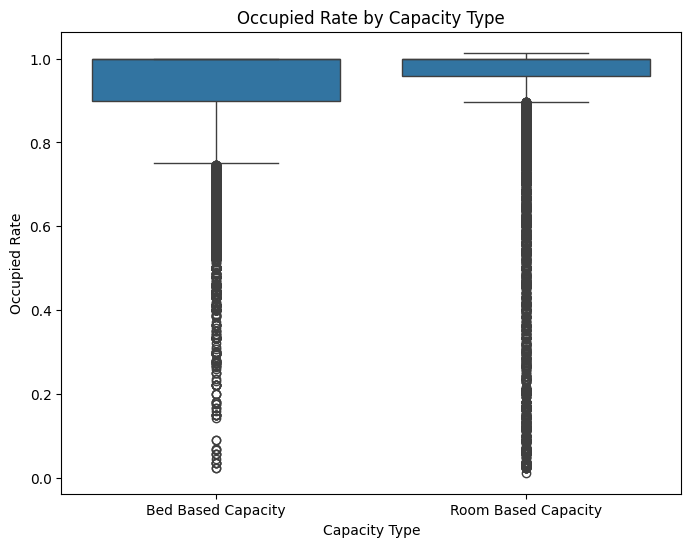

In [66]:
# Plotting boxplots for Occupied Rates in Bed Based and Room Based capacity types
plt.figure(figsize=(8, 6))
sns.boxplot(x='CAPACITY_TYPE', y='OCCUPIED_RATE', data=pd.concat([bed_based_data, room_based_data]))
plt.title('Occupied Rate by Capacity Type')
plt.xlabel('Capacity Type')
plt.ylabel('Occupied Rate')
plt.show()

In [67]:
# Conduct a t-test on 'OCCUPIED_RATE'
t_stat, p_val = stats.ttest_ind(
    bed_based_data['OCCUPIED_RATE'].dropna(),
    room_based_data['OCCUPIED_RATE'].dropna()
)

print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -4.854104599422829
p-value = 1.2128933183471424e-06


In [68]:
# Conduct a welch's t-test on 'OCCUPIED_RATE'
t_stat, p_val = stats.ttest_ind(
    bed_based_data['OCCUPIED_RATE'].dropna(),
    room_based_data['OCCUPIED_RATE'].dropna(),
    equal_var = False
)

print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -4.498751771925636
p-value = 6.860477551487939e-06


# T-test Analysis of Occupancy Rates by Program Model


In [69]:
# Separating data based on Program model: 'Emergency' and 'Transitional'
Emergency_data = data[data['PROGRAM_MODEL'] == 'Emergency']
Transitional_data = data[data['PROGRAM_MODEL'] == 'Transitional']

In [70]:
Emergency_data

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPIED_RATE
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0,0.896552
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0,1.000000
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0,0.821429
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0,1.000000
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0,0.928571
...,...,...,...,...,...,...,...,...
50937,Bed Based Capacity,Emergency,22,24.0,22.0,NaN,NaN,0.916667
50938,Bed Based Capacity,Emergency,16,19.0,16.0,NaN,NaN,0.842105
50939,Bed Based Capacity,Emergency,6,20.0,6.0,NaN,NaN,0.300000
50940,Bed Based Capacity,Emergency,23,23.0,23.0,NaN,NaN,1.000000


In [71]:
Transitional_data

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPIED_RATE
21,Bed Based Capacity,Transitional,10,12.0,10.0,NaN,NaN,0.833333
29,Bed Based Capacity,Transitional,32,32.0,32.0,NaN,NaN,1.000000
31,Bed Based Capacity,Transitional,23,23.0,23.0,NaN,NaN,1.000000
36,Bed Based Capacity,Transitional,61,66.0,61.0,NaN,NaN,0.924242
41,Bed Based Capacity,Transitional,18,22.0,18.0,NaN,NaN,0.818182
...,...,...,...,...,...,...,...,...
50914,Room Based Capacity,Transitional,219,NaN,NaN,63.0,62.0,0.984127
50916,Room Based Capacity,Transitional,63,NaN,NaN,23.0,22.0,0.956522
50935,Bed Based Capacity,Transitional,22,25.0,22.0,NaN,NaN,0.880000
50941,Bed Based Capacity,Transitional,13,14.0,13.0,NaN,NaN,0.928571


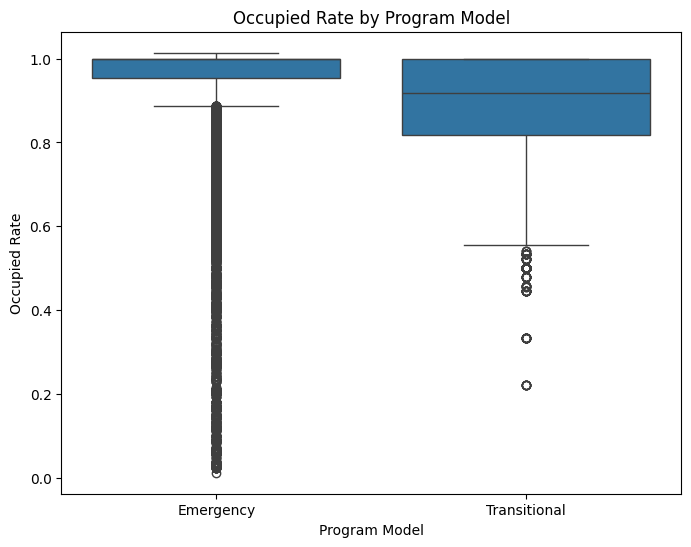

In [72]:
# Plotting boxplots for Occupied Rates in Emergency and Transitional program models
plt.figure(figsize=(8, 6))
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPIED_RATE', data=pd.concat([Emergency_data, Transitional_data]))
plt.title('Occupied Rate by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Occupied Rate')
plt.show()

In [73]:
# Conduct a welch's t-test on 'OCCUPIED_RATE'
t_stat, p_val = stats.ttest_ind(
    Emergency_data['OCCUPIED_RATE'].dropna(),
    Transitional_data['OCCUPIED_RATE'].dropna(),
    equal_var = False
)

print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 40.981115372199206
p-value = 0.0
